In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
BASE_PATH = Path('../data')
pd.__version__

'1.1.3'

In [2]:
order =  pd.read_csv(BASE_PATH/'olist_orders_dataset.csv')
order_item = pd.read_csv(BASE_PATH/'olist_order_items_dataset.csv')

Forecast order

In [3]:
# orders through time

# -- preprocess datetime columns -> create new columns by parse to datetime and convert to date
dt_cols_orders = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']
dt_cols_order_items = ['shipping_limit_date']
for col in dt_cols_orders: order[col+'_as_date'] = order[col].apply(lambda x:pd.to_datetime(x).date())
for col in dt_cols_order_items: order_item[col+'_as_date'] = order_item[col].apply(lambda x:pd.to_datetime(x).date())

In [4]:
# -- group order by date
order_by_date = order.groupby(['order_purchase_timestamp_as_date'])['order_id'].count().reset_index()

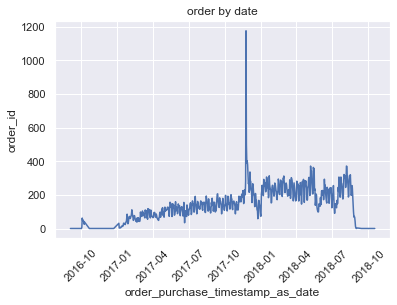

In [6]:
# -- plot order by date
_ = sns.lineplot(x='order_purchase_timestamp_as_date',y='order_id', data=order_by_date)
_ = plt.title('order by date')
_ = plt.xticks(rotation=45)

In [9]:
# !pip install pystan
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zp/625m8d0s29sbgc7ssns_v3x80000gp/T/pip-install-61oiz8_4/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/zp/625m8d0s29sbgc7ssns_v3x80000gp/T/pip-install-61oiz8_4/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/zp/625m8d0s29sbgc7ssns_v3x80000gp/T/pip-wheel-j0wz5o30
       cwd: /private/var/folders/zp/625m8d0s29sbgc7ssns_v3x80000gp/T/pip-install-61oiz8_4/fbprophet/
  Complete output (9 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR M

Forecast revenue (good price)

Forecast revenue (good frieght)